<a href="https://colab.research.google.com/github/Sarahshaikh31/DIABETES-DATA-ANALYSIS-/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYSIS AND PREDICTION(REGRESSION)**
--
---
***SARAH SHAIKH*** *CS20035*

***SHRADDHA POKALE*** *CS20071*

***SARVESH SATHAWANE*** *CS20085*

***PROBLEM STATEMENT*** :- Whether the patient has diabetes or not.

***Importing Libraries***

In [ ]:
# IMPORTING ALL THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Apply the default default seaborn theme, scaling, and color palette
sns.set()
#We can also customize seaborn theme or use one of six variations of the default theme. 
#Which are called deep, muted, pastel, bright, dark, and colorblind.

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#enables the inline plotting, where the plots/graphs will be displayed just below the cell where plotting commands are written

***Importing the dataset***

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()
#Importing of the dataset 'diabetes' and displaying the first 5 rows of the dataset.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Exploratory Data Analysis***

In [ ]:
diabetes_df.columns
# Total number of columns in the dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes_df.info()
#The info() method prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe()
#describe function is used to get a descriptive statistics summary of a given dataframe. 
#This includes mean, count, std deviation, percentiles, and min-max values of all the features.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.isnull().head(10)
#Finding out the null values in the first 10 'rows' of the dataset.
#If there is any null value in the dataset then it returns the value as 'True', either 'False'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
diabetes_df.isnull().sum()
#Finding sum of all the null values/missing values in each column of the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*There is not any missing values.*

*There are 8 features and 768 entires, all non-null. All of the features are numerical and the target is categorical.*

In [ ]:
diabetes_df_copy = diabetes_df.copy(deep = True) #default
#copy() creates reference to original object.
#Modifications to the data or indices of the copy will not be reflected in the original object.

diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
#replacing 0 with NaN values in the reference dataset

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


***Data Visualization***

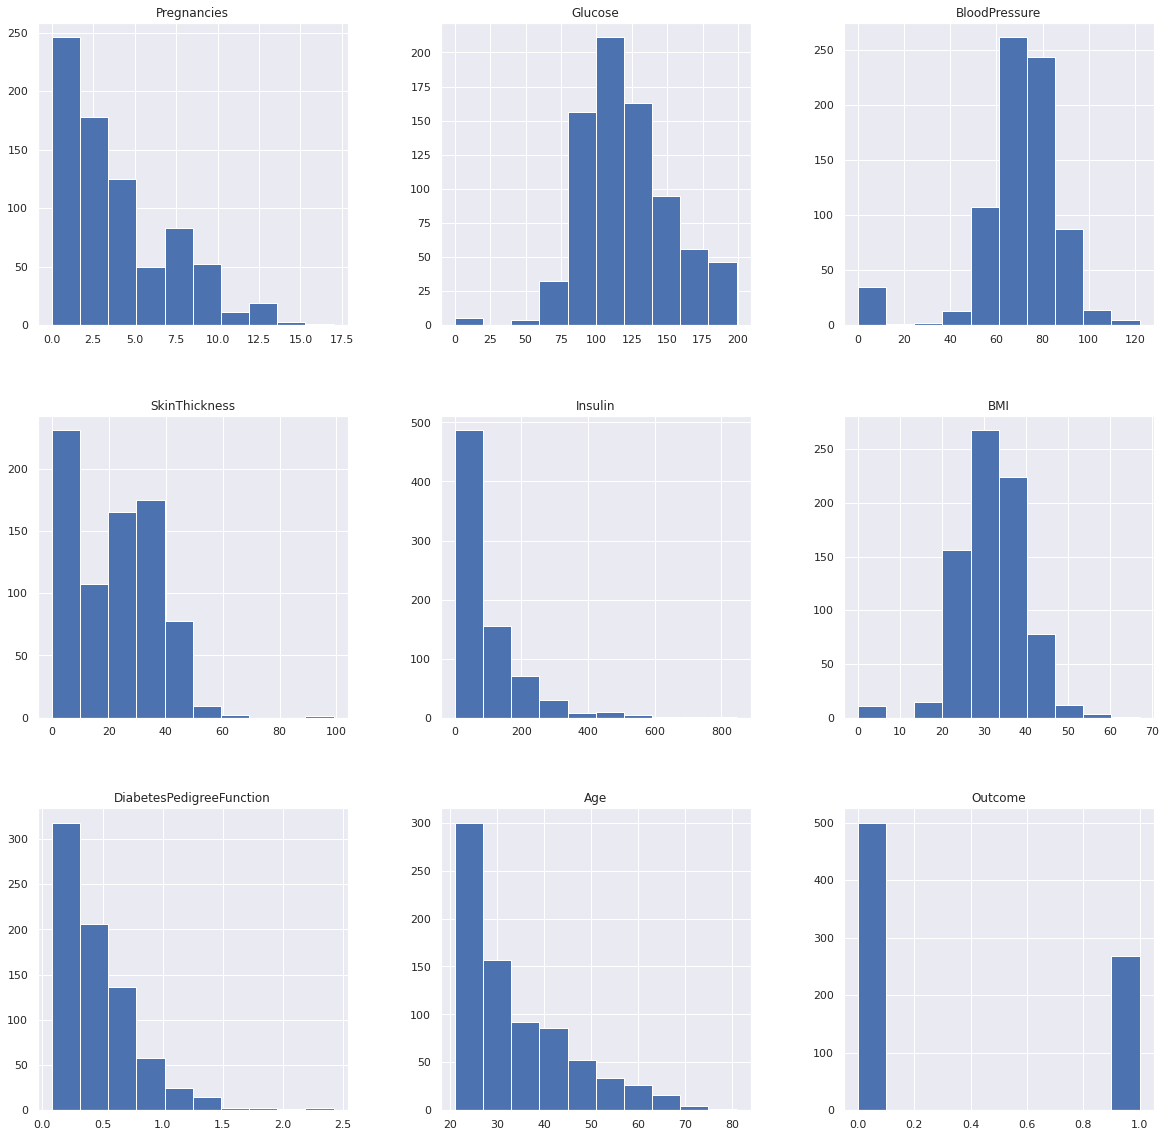

In [ ]:
p = diabetes_df.hist(figsize = (20,20))
# Plot the histogram with hist() function.
# A histogram is a graphical display of data using bars of different heights.

In [ ]:
# Assigning the NAN values for the columns in accordance with their distribution
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

#The fillna() method replaces the NULL values with a specified value.
#The mean of the observed values for each variable is computed and the missing values for that variable are imputed by this mean.

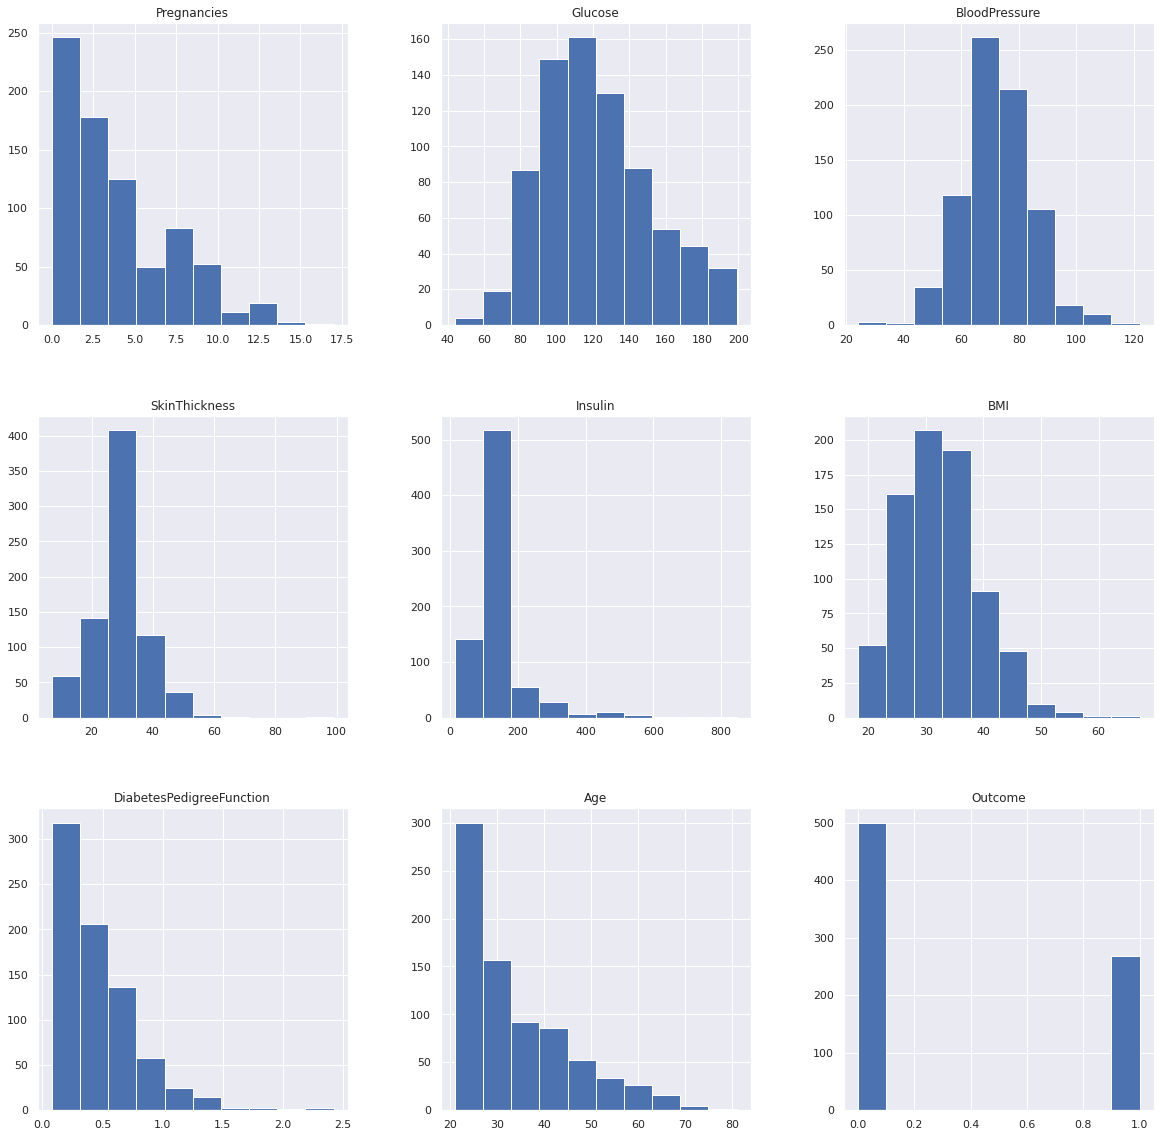

In [ ]:
# Plotting the distributions after removing the NAN values.
p = diabetes_df_copy.hist(figsize = (20,20))

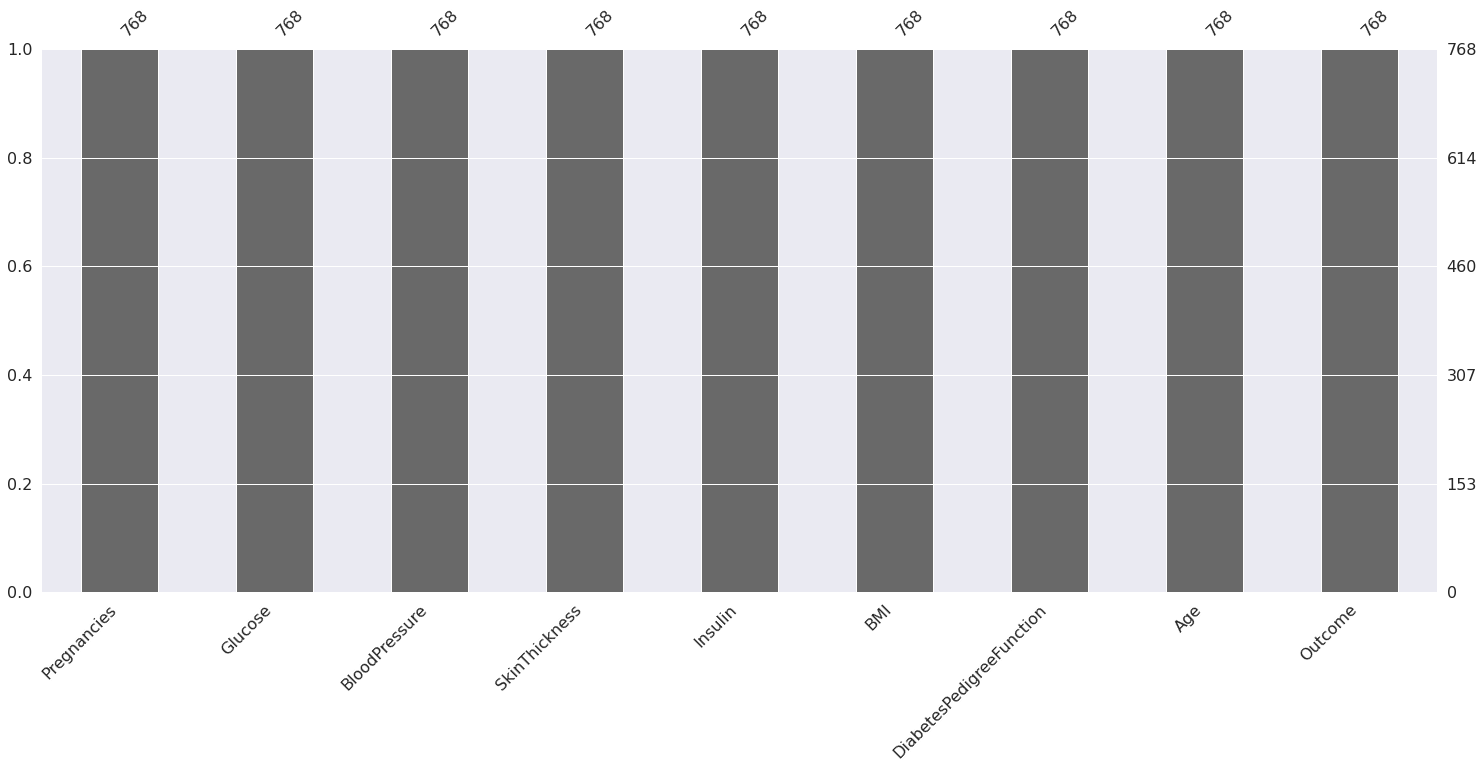

In [ ]:
# Plotting Null Count Analysis Plot
p = msno.bar(diabetes_df)
# Missingno a Python library for the exploratory visualization of missing data.

0    500
1    268
Name: Outcome, dtype: int64


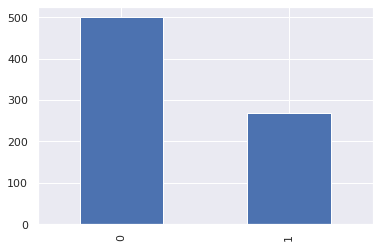

In [ ]:
# Checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

#The graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. 
#The number of non-diabetics is almost twice the number of diabetic patients

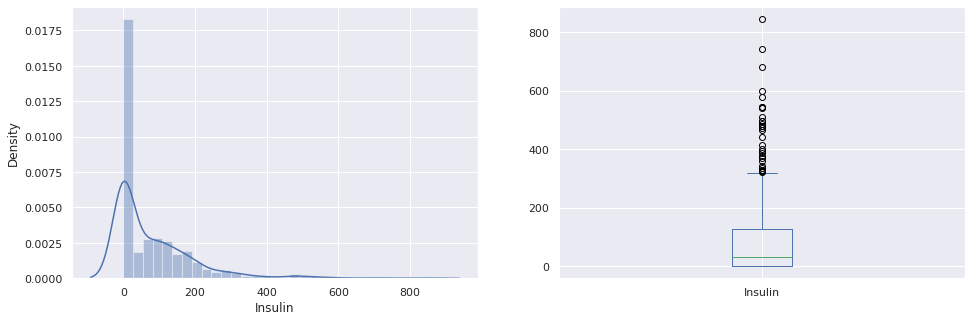

In [ ]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

***Bivariate Analysis***
---

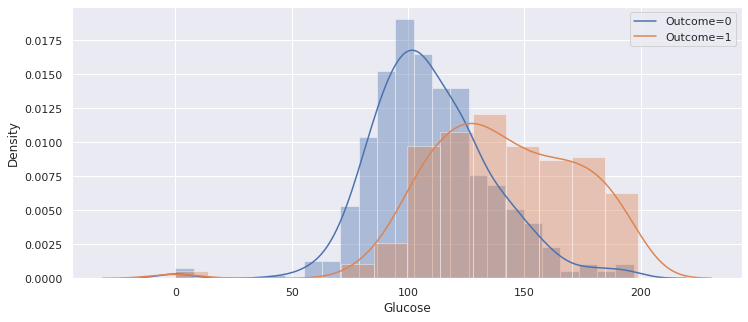

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(diabetes_df['Glucose'][diabetes_df.Outcome==0])
sns.distplot(diabetes_df['Glucose'][diabetes_df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

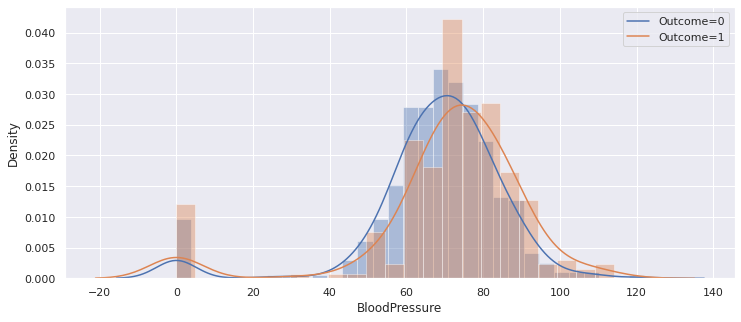

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(diabetes_df[ 'BloodPressure'][diabetes_df.Outcome==0])
sns.distplot(diabetes_df[ 'BloodPressure'][diabetes_df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

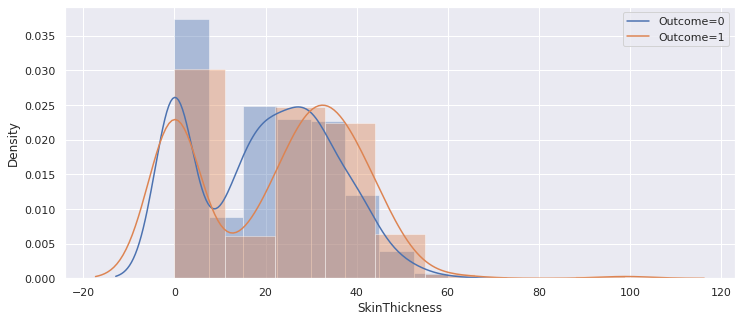

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(diabetes_df['SkinThickness'][diabetes_df.Outcome==0])
sns.distplot(diabetes_df['SkinThickness'][diabetes_df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

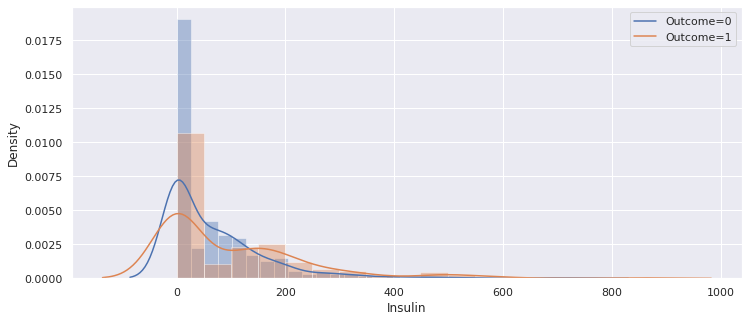

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(diabetes_df['Insulin'][diabetes_df.Outcome==0])
sns.distplot(diabetes_df['Insulin'][diabetes_df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

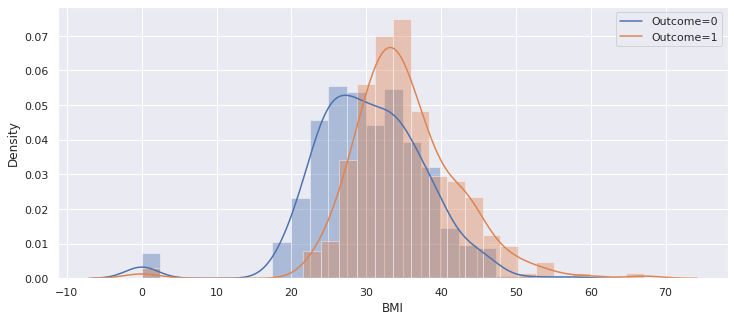

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(diabetes_df['BMI'][diabetes_df.Outcome==0])
sns.distplot(diabetes_df['BMI'][diabetes_df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

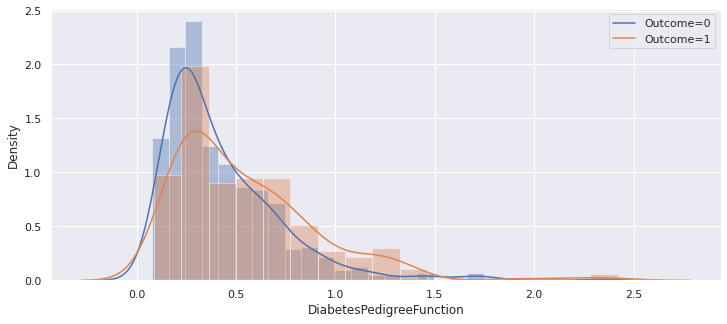

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(diabetes_df['DiabetesPedigreeFunction'][diabetes_df.Outcome==0])
sns.distplot(diabetes_df['DiabetesPedigreeFunction'][diabetes_df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

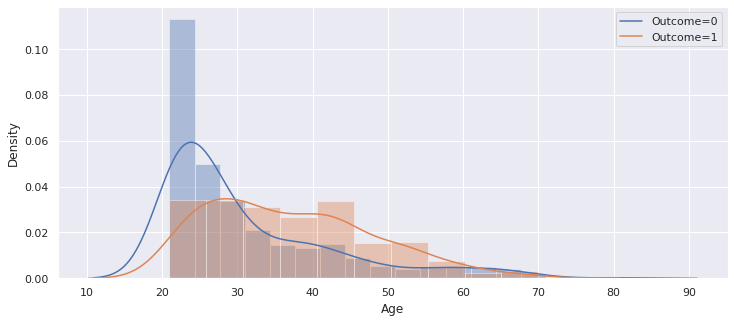

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(diabetes_df['Age'][diabetes_df.Outcome==0])
sns.distplot(diabetes_df['Age'][diabetes_df.Outcome==1])
plt.legend(['Outcome=0','Outcome=1'])
plt.show()

***Correlation between all the features***

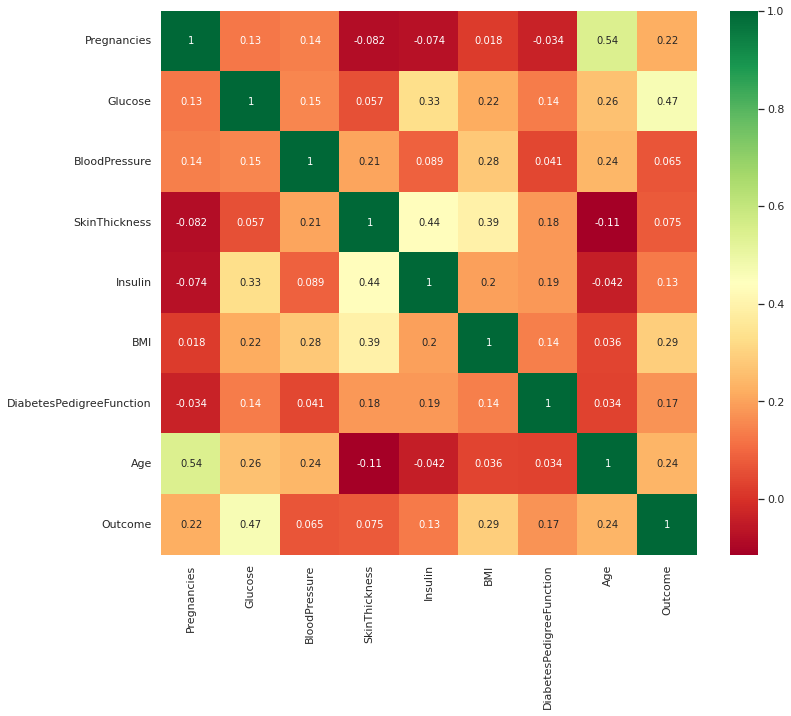

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

***Scaling the Data***

In [ ]:
diabetes_df_copy.head()
#Diplaying the first 5 rows of the reference dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = diabetes_df_copy.Outcome
y
# Assigning 'outcome' to 'y' of the reference dataset(created using copy function)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

***Model Building***
---
***Splitting the dataset***

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
# .drop removes the specified row or column.
# As axis is set to 1 then it drops the 'outcome' column.
y = diabetes_df['Outcome']
# assigning y as 'Outcome' of the dataset.

In [ ]:
#importing the train_test_split 
#The train-test split is used to estimate the performance of machine learning 
#algorithms that are applicable for prediction-based Algorithms/Applications.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

***Random Forest***
---
***Building the model using RandomForest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#importing RandomForestClassifer

# Create a Random forest Classifier
rfc = RandomForestClassifier(n_estimators=200)

# Train the model using the training sets
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)

#A random forest is a meta estimator that fits a number of decision tree 
#classifiers on various sub-samples of the dataset and uses averaging to improve 
#the predictive accuracy and control over-fitting.

RandomForestClassifier(n_estimators=200)

In [ ]:
#predict() function enables us to predict the labels of the data values on the 
#basis of the trained model.
rfc_train = rfc.predict(X_train)
#The predict() function accepts only a single argument which is 
#usually the data to be tested.

from sklearn import metrics
# Importing metrics.
# Metrics are used to monitor and measure the performance of a model. 

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [ ]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7795275590551181


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[138  24]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.71      0.65      0.68        92

    accuracy                           0.78       254
   macro avg       0.76      0.75      0.76       254
weighted avg       0.78      0.78      0.78       254



***Decision Tree***
---
***Building the model using DecisionTree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7125984251968503


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[129  33]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       162
           1       0.61      0.57      0.59        92

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254



***XgBoost classifier***
---
***Building model using XGBoost***

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7795275590551181


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[136  26]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       162
           1       0.70      0.67      0.69        92

    accuracy                           0.78       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.78      0.78      0.78       254



***Support Vector Machine (SVM)***
---
***Building the model using Support Vector Machine (SVM)***

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

***Prediction from support vector machine model on the testing data***

In [ ]:
svc_pred = svc_model.predict(X_test)

***Accuracy score for SVM***

In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7480314960629921


***Classification report and confusion matrix of the SVM classifier***

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



***Conclusion***
--
---


Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.76.

***Feature Importance***
---


In [ ]:
rfc.feature_importances_

array([0.08034033, 0.2560345 , 0.09001569, 0.07126436, 0.07102118,
       0.16416582, 0.13012292, 0.13703519])

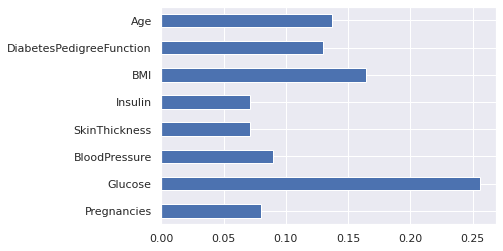

In [ ]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

***Saving Model – Random Forest***
---

In [ ]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1])

In [ ]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0])

**Conclusion**
--
---

After using all these patient records, we are able to build a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.